# Tokenization

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

**Why can't LLM spell words**  
LLMs see words as token chunks, not letter by letter, so unusual spellings may split into strange token combinations the model hasn't seen together often.  

**Why can't LLM do super simple string processing tasks like reversing a string**  
LLMs process text as tokens, not individual characters, making character-by-character operations like string reversal difficult.  

**Why is LLM worse at non-English languages (e.g. Japanese)**  
Languages like Japanese tokenize inefficiently, often requiring more tokens per word than English, giving the model less context to work with.  

**Why is LLM bad at simple arithmetic**  
Numbers get split into multiple tokens based on digit patterns, making it harder for the model to understand numerical relationships.  

**Why did GPT-2 have more than necessary trouble coding in Python**  
Code tokens were less common in GPT-2's training data, and programming syntax often gets split in unintuitive ways. For example, indentation spaces occupy a huge part of the context window.  

**Why did my LLM abruptly halt when it sees the string "<|endoftext|>"**  
This specific string is a special token used during training to mark the end of documents, so models interpret it as a signal to stop generating.  

**Why does the LLM break if I ask it about "SolidGoldMagikarp"**  
This specific string became famous because in early GPT models, it tokenized into an unusual pattern that caused the model to produce repetitive or nonsensical outputs. A hypothesis is that it's related to a Reddit username.  

**Why should I prefer to use YAML over JSON with LLMs**  
YAML formatting creates more natural language-like tokens than JSON's special characters and strict syntax.  



Good tokenization web app: [https://tiktokenizer.vercel.app](https://tiktokenizer.vercel.app)


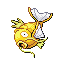

_____

## Byte-pair encoding

https://en.wikipedia.org/wiki/Byte_pair_encoding

In [1]:
#As usual, i change the original text just for fun
# Using this awesome bit of James Donald Forbes McCann --> https://www.youtube.com/watch?v=udSMZG_L-S0
text="Fool me once, shame on you. Fool me twice, shame on me. Fool me three times, there's twice as much shame on me. I cannot believe I allowed you to fool me again. Definitely learned from the first time not to be fooled. Fool me four times, shame back on you, actually. You are picking on a vulnerable man; something has obviously gone wrong with me. This is like bullying the kid in a wheelchair at primary school. It's like bullying the fat kid, bullying the kid with a limp. Four times? You're gonna fool me? Unbelievable. Fool me five times, shame on me again. I mean, I'm vulnerable, but at some point, you have to take some personal responsibility, for crying out loud. I've got twelve of these; they're good for eight. Fool me six times—probably six times—a fool. And I have lured you into my trap, pretending to be a fool six consecutive times to give you a false sense of security, only to flip it, and now you are the fool, and you have the shame. Fool me seven times, you saw through my trick, but there's no shame, because I'm getting fooled by the best. Fool me eight times, and this is no longer fooling—this is systematic cruelty. And rather than allocating shame or even looking at you as an individual, I'd like you to unpack the nature of your fooling, remove the fool privilege that you're bringing to the situation, and build a freer world for us all. But fool me nine times—well, that's one time too many, and I will rise up with all the other members of the Foolertariat to install a dictatorship of the fools and wipe out the people who have been fooling us. But fool me ten times—the revolution goes awry, just in a sort of Stalin-taking-over-the-USSR type situation."


tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
print(text)
print("length:", len(text))
print('---')
print(tokens)
print("length:", len(tokens))

---
Fool me once, shame on you. Fool me twice, shame on me. Fool me three times, there's twice as much shame on me. I cannot believe I allowed you to fool me again. Definitely learned from the first time not to be fooled. Fool me four times, shame back on you, actually. You are picking on a vulnerable man; something has obviously gone wrong with me. This is like bullying the kid in a wheelchair at primary school. It's like bullying the fat kid, bullying the kid with a limp. Four times? You're gonna fool me? Unbelievable. Fool me five times, shame on me again. I mean, I'm vulnerable, but at some point, you have to take some personal responsibility, for crying out loud. I've got twelve of these; they're good for eight. Fool me six times—probably six times—a fool. And I have lured you into my trap, pretending to be a fool six consecutive times to give you a false sense of security, only to flip it, and now you are the fool, and you have the shame. Fool me seven times, you saw through my t

In [2]:
def get_stats(ids):
    """
    Counts occurrences of consecutive element pairs in the given list.
    """
    
    counts = {}  # Dictionary to store the count of each consecutive pair
    
    # Iterate through consecutive elements
    for pair in zip(ids, ids[1:]):  
        counts[pair] = counts.get(pair, 0) + 1  # Increment the count for the pair, initializing to 0 if not present
    
    return counts 

stats = get_stats(tokens)
#print(stats)
print(sorted(((value,key) for key,value in stats.items()), reverse=True))

[(74, (101, 32)), (55, (32, 116)), (42, (109, 101)), (33, (116, 104)), (30, (32, 97)), (27, (111, 111)), (27, (105, 110)), (25, (111, 108)), (25, (44, 32)), (25, (32, 102)), (23, (104, 101)), (23, (32, 115)), (23, (32, 109)), (22, (111, 117)), (20, (116, 105)), (20, (32, 111)), (19, (116, 32)), (19, (111, 110)), (19, (46, 32)), (18, (115, 32)), (18, (110, 103)), (18, (108, 32)), (18, (102, 111)), (18, (100, 32)), (17, (104, 97)), (15, (114, 101)), (15, (110, 32)), (15, (105, 109)), (15, (101, 115)), (15, (32, 98)), (14, (118, 101)), (14, (111, 32)), (14, (97, 116)), (13, (121, 111)), (13, (103, 32)), (13, (32, 121)), (12, (116, 111)), (12, (114, 32)), (12, (108, 105)), (12, (101, 114)), (12, (97, 110)), (11, (108, 108)), (10, (117, 32)), (10, (110, 100)), (10, (97, 108)), (10, (97, 32)), (10, (70, 111)), (10, (32, 73)), (9, (115, 104)), (9, (115, 101)), (9, (108, 101)), (9, (105, 116)), (9, (32, 119)), (9, (32, 108)), (9, (32, 105)), (9, (32, 70)), (8, (121, 32)), (8, (117, 116)), (8, 

In [3]:
chr(101), chr(32)

('e', ' ')

In [4]:
def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

top_pair = max(stats, key=stats.get)
tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length:", len(tokens2))

[70, 111, 111, 108, 32, 109, 256, 111, 110, 99, 101, 44, 32, 115, 104, 97, 109, 256, 111, 110, 32, 121, 111, 117, 46, 32, 70, 111, 111, 108, 32, 109, 256, 116, 119, 105, 99, 101, 44, 32, 115, 104, 97, 109, 256, 111, 110, 32, 109, 101, 46, 32, 70, 111, 111, 108, 32, 109, 256, 116, 104, 114, 101, 256, 116, 105, 109, 101, 115, 44, 32, 116, 104, 101, 114, 101, 39, 115, 32, 116, 119, 105, 99, 256, 97, 115, 32, 109, 117, 99, 104, 32, 115, 104, 97, 109, 256, 111, 110, 32, 109, 101, 46, 32, 73, 32, 99, 97, 110, 110, 111, 116, 32, 98, 101, 108, 105, 101, 118, 256, 73, 32, 97, 108, 108, 111, 119, 101, 100, 32, 121, 111, 117, 32, 116, 111, 32, 102, 111, 111, 108, 32, 109, 256, 97, 103, 97, 105, 110, 46, 32, 68, 101, 102, 105, 110, 105, 116, 101, 108, 121, 32, 108, 101, 97, 114, 110, 101, 100, 32, 102, 114, 111, 109, 32, 116, 104, 256, 102, 105, 114, 115, 116, 32, 116, 105, 109, 256, 110, 111, 116, 32, 116, 111, 32, 98, 256, 102, 111, 111, 108, 101, 100, 46, 32, 70, 111, 111, 108, 32, 109, 256, 10

i keep the original text

In [5]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"Merge #{i} {pair} `{chr(pair[0])}{chr(pair[1])}` --> {idx} `{chr(idx)}`")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

Merge #0 (101, 32) `e ` --> 256 `Ā`
Merge #1 (32, 116) ` t` --> 257 `ā`
Merge #2 (111, 111) `oo` --> 258 `Ă`
Merge #3 (105, 110) `in` --> 259 `ă`
Merge #4 (32, 97) ` a` --> 260 `Ą`
Merge #5 (258, 108) `Ăl` --> 261 `ą`
Merge #6 (32, 109) ` m` --> 262 `Ć`
Merge #7 (111, 117) `ou` --> 263 `ć`
Merge #8 (111, 110) `on` --> 264 `Ĉ`
Merge #9 (46, 32) `. ` --> 265 `ĉ`
Merge #10 (257, 104) `āh` --> 266 `Ċ`
Merge #11 (44, 32) `, ` --> 267 `ċ`
Merge #12 (100, 32) `d ` --> 268 `Č`
Merge #13 (259, 103) `ăg` --> 269 `č`
Merge #14 (104, 97) `ha` --> 270 `Ď`
Merge #15 (105, 109) `im` --> 271 `ď`
Merge #16 (101, 115) `es` --> 272 `Đ`
Merge #17 (256, 116) `Āt` --> 273 `đ`
Merge #18 (102, 261) `fą` --> 274 `Ē`
Merge #19 (121, 263) `yć` --> 275 `ē`


In [6]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 1698
ids length: 1243
compression ratio: 1.37X


The Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

_____
### decoding

Given a sequence of integers in the range [0, vocab_size], what is the text?


In [7]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids) #concatenate bytes
  text = tokens.decode("utf-8", errors="replace")# errors="strict"
  return text

print(decode([97]))

#not every 

a


___
### encoding

The other way around: Given a string, what are the tokens?


In [8]:
def encode(text):
    """
    Encodes a given string into a list of integer tokens using a merge-based encoding scheme.
    """

    # Convert the input string into a list of UTF-8 byte values (tokens)
    tokens = list(text.encode("utf-8"))

    # Continue merging tokens until no more valid merges exist
    while len(tokens) >= 2:  # Need at least 2 tokens to merge
        # Get the frequency of all consecutive token pairs
        stats = get_stats(tokens)
        # Find the pair with the lowest index in the `merges` dictionary (or inf if not in merges)
        pair = min(stats, key=lambda p: merges.get(p, float("inf")))

        # If the selected pair is not in the `merges` dictionary, stop merging
        if pair not in merges:
            break  

        # Get the index assigned to this pair from the `merges` dictionary
        idx = merges[pair]

        # Merge the selected pair into a single token
        tokens = merge(tokens, pair, idx)

    return tokens  # Return the final list of merged tokens


In [9]:
# Example usages:
print(encode("Fool me once"))  # Should return an empty list since input is empty
print("".join(chr(c) for c in encode("Fool me once"))) 
print(decode(encode("Fool me once")))

[70, 261, 262, 256, 264, 99, 101]
FąĆĀĈce
Fool me once


In [10]:
text2 = decode(encode(text))
print(text2 == text)

True


In [11]:
# trying with another bit https://www.youtube.com/watch?v=7akJJ3Ddxb0
valtext = "I would never call a woman crazy to her face; they hate it, and it makes them go insane. The word 'crazy' can mean too many things. When a man calls a former girlfriend crazy, it could either mean she ripped the head off a rabbit and threw it at my door, threatened to kill me, and burnt all of my things, or it could mean she got a little too upset when she found out I was sleeping with a prostitute. It could mean anything to a man. We have a term for us as well that's too broad: 'creepy.' Creepy could be a man who has trouble looking you in the eye and stands a bit too close on a bus, or it could be a man who rapes his whole family in a dungeon prison under his house. It's too broad a term. Ladies, 'he's a creepy guy'—does he not wash, or does he kill? It's the sort of crazy use of language we've been complaining about."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


## Forced splits using regex patterns (GPT series)


https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf

We observed BPE including many versions of common words like ```dog``` since they occur in many variations such as ```dog.``` ```dog!```
```dog?```. This results in a sub-optimal allocation of limited vocabulary slots and model capacity. To avoid this, we prevent BPE from merging across character categories for any byte sequence. We add an exception for spaces which significantly improves the compression efficiency while adding
only minimal fragmentation of words across multiple vocab tokens

https://github.com/openai/gpt-2


``` python
class Encoder:
    def __init__(self, encoder, bpe_merges, errors='replace'):
        self.encoder = encoder
        self.decoder = {v:k for k,v in self.encoder.items()}
        self.errors = errors # how to handle errors in decoding
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v:k for k, v in self.byte_encoder.items()}
        self.bpe_ranks = dict(zip(bpe_merges, range(len(bpe_merges))))
        self.cache = {}

        # Should haved added re.IGNORECASE so BPE merges can happen for capitalized versions of contractions
        self.pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

```


#### 1. **Contractions**

```python
's|'t|'re|'ve|'m|'ll|'d
```

Matches: Common English contractions like 's, 't, 're, etc.

Purpose: Ensures contractions are split into separate tokens (e.g., "don't" → ["don", "'t"]).


#### 2. **Words**  
```python
?\p{L}+
```

?: Optional leading space (matches 0 or 1 space).

\p{L}+: One or more Unicode letters.

Matches: Words with or without a leading space (e.g., "hello" or " hello").

#### 3. **Numbers**  

```python
?\p{N}+
```

?: Optional leading space.

\p{N}+: One or more Unicode numbers.

Matches: Numbers with or without a leading space (e.g., "123" or " 456").


### 4 Symbols/Punctuation

```python
?[^\s\p{L}\p{N}]+
```

?: Optional leading space.

[^\s\p{L}\p{N}]: Any character that is not whitespace, a letter, or a number.

Matches: Symbols, punctuation, or emojis with optional leading space (e.g., "!", " 😀").

### 5 Trailing whitespace

```python
\s+(?!\S)
```

\s+: One or more whitespace characters.

(?!\S): Negative lookahead to ensure whitespace is not followed by non-whitespace.

Matches: Whitespace at the end of a string or line (e.g., " " in "hello ").

### 6 General Whitespace

```python
\s+
```

\s+: One or more whitespace characters.

Matches: Remaining whitespace not captured by earlier rules (e.g., spaces between words).


____

**Order Matters**: The regex engine tries alternatives from left to right. Contractions are prioritized first.

**Single vs. Multiple Spaces**:

A single leading space is included with a word/number/symbol (e.g., " hello" → one token).

Multiple spaces are split into separate tokens (e.g., " hello" → [" ", "hello"]).


In [12]:
#%pip install regex
import regex as re

gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")


In [13]:
print(re.findall(gpt2pat, "Hello world"))

['Hello', ' world']


In [14]:
print(re.findall(gpt2pat, "I've eating 3 apples"))

['I', "'ve", ' eating', ' 3', ' apples']


In [15]:
print(re.findall(gpt2pat, "I'VE EATING 3 APPLES"))

['I', "'", 'VE', ' EATING', ' 3', ' APPLES']


In [16]:
example = """
example = "
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
        "
print(re.findall(gpt2pat, example))
"""
print(re.findall(gpt2pat, example))

['\n', 'example', ' =', ' "', '\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n       ', ' "', '\n', 'print', '(', 're', '.', 'findall', '(', 'gpt', '2', 'pat', ',', ' example', '))', '\n']


In [19]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


Download vocab.bpe and encoder.json from the gpt2 repo

In [1]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

--2025-03-11 11:29:45--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [application/octet-stream]
Saving to: ‘vocab.bpe’

vocab.bpe           100%[===================>] 445,62K   550KB/s    in 0,8s    

2025-03-11 11:29:46 (550 KB/s) - ‘vocab.bpe’ saved [456318/456318]

--2025-03-11 11:29:46--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving t

In [3]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"


#with enconder and merges we can represent a tokenizer, encode and decode

In [5]:
encoder

{'!': 0,
 '"': 1,
 '#': 2,
 '$': 3,
 '%': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 '*': 9,
 '+': 10,
 ',': 11,
 '-': 12,
 '.': 13,
 '/': 14,
 '0': 15,
 '1': 16,
 '2': 17,
 '3': 18,
 '4': 19,
 '5': 20,
 '6': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 ':': 25,
 ';': 26,
 '<': 27,
 '=': 28,
 '>': 29,
 '?': 30,
 '@': 31,
 'A': 32,
 'B': 33,
 'C': 34,
 'D': 35,
 'E': 36,
 'F': 37,
 'G': 38,
 'H': 39,
 'I': 40,
 'J': 41,
 'K': 42,
 'L': 43,
 'M': 44,
 'N': 45,
 'O': 46,
 'P': 47,
 'Q': 48,
 'R': 49,
 'S': 50,
 'T': 51,
 'U': 52,
 'V': 53,
 'W': 54,
 'X': 55,
 'Y': 56,
 'Z': 57,
 '[': 58,
 '\\': 59,
 ']': 60,
 '^': 61,
 '_': 62,
 '`': 63,
 'a': 64,
 'b': 65,
 'c': 66,
 'd': 67,
 'e': 68,
 'f': 69,
 'g': 70,
 'h': 71,
 'i': 72,
 'j': 73,
 'k': 74,
 'l': 75,
 'm': 76,
 'n': 77,
 'o': 78,
 'p': 79,
 'q': 80,
 'r': 81,
 's': 82,
 't': 83,
 'u': 84,
 'v': 85,
 'w': 86,
 'x': 87,
 'y': 88,
 'z': 89,
 '{': 90,
 '|': 91,
 '}': 92,
 '~': 93,
 '¡': 94,
 '¢': 95,
 '£': 96,
 '¤': 97,
 '¥': 98,
 '¦': 99,
 '§': 100

In [9]:
# Find the 10 longest tokens in the encoder
longest_tokens = sorted(encoder.keys(), key=len, reverse=True)[:20]

# Print the longest tokens
for token in longest_tokens:
    print(f"{token}")

ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ
Ġ=================================================================
Ġ----------------------------------------------------------------
----------------------------------------------------------------
ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ
................................................................
________________________________________________________________
--------------------------------------------------------
âĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶâĢĶ
------------------------------------------------
Ġ=================================
Ġ--------------------------------
Ġ********************************
--------------------------------
................................
________________________________
ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ
********************************


In [6]:
encoder['<|endoftext|>'] # special token in use for the GPT-2 base model. used to separate different texts in the training

50256

___


### sentencepiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both **Llama** and **Mistral** series.

[sentencepiece on Github link](https://github.com/google/sentencepiece).

**The big difference**: sentencepiece runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

TLDR:

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

(Personally I think the tiktoken way is a lot cleaner...)

In [1]:
import sentencepiece as spm

In [12]:
#Training with the start of Don Quijote
with open("quixote_sentencepiece.txt", "w", encoding="utf-8") as f:
    f.write("En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los autores que deste caso escriben; aunque, por conjeturas verosímiles, se deja entender que se llamaba Quejana. Pero esto importa poco a nuestro cuento; basta que en la narración dél no se salga un punto de la verdad. Es, pues, de saber que este sobredicho hidalgo, los ratos que estaba ocioso, que eran los más del año, se daba a leer libros de caballerías, con tanta afición y gusto, que olvidó casi de todo punto el ejercicio de la caza, y aun la administración de su hacienda. Y llegó a tanto su curiosidad y desatino en esto, que vendió muchas hanegas de tierra de sembradura para comprar libros de caballerías en que leer, y así, llevó a su casa todos cuantos pudo haber dellos; y de todos, ningunos le parecían tan bien como los que compuso el famoso Feliciano de Silva, porque la claridad de su prosa y aquellas entricadas razones suyas le parecían de perlas, y más cuando llegaba a leer aquellos requiebros y cartas de desafíos, donde en muchas partes hallaba escrito: La razón de la sinrazón que a mi razón se hace, de tal manera mi razón enflaquece, que con razón me quejo de la vuestra fermosura. Y también cuando leía: ...los altos cielos que de vuestra divinidad divinamente con las estrellas os fortifican, y os hacen merecedora del merecimiento que merece la vuestra grandeza. Con estas razones perdía el pobre caballero el juicio, y desvelábase por entenderlas y desentrañarles el sentido, que no se lo sacara ni las entendiera el mesmo Aristóteles, si resucitara para sólo ello. No estaba muy bien con las heridas que don Belianís daba y recebía, porque se imaginaba que, por grandes maestros que le hubiesen curado, no dejaría de tener el rostro y todo el cuerpo lleno de cicatrices y señales. Pero, con todo, alababa en su autor aquel acabar su libro con la promesa de aquella inacabable aventura, y muchas veces le vino deseo de tomar la pluma y dalle fin al pie de la letra, como allí se promete; y sin duda alguna lo hiciera, y aun saliera con ello, si otros mayores y continuos pensamientos no se lo estorbaran. Tuvo muchas veces competencia con el cura de su lugar -que era hombre docto, graduado en Sigüenza-, sobre cuál había sido mejor caballero: Palmerín de Ingalaterra o Amadís de Gaula; mas maese Nicolás, barbero del mesmo pueblo, decía que ninguno llegaba al Caballero del Febo, y que si alguno se le podía comparar, era don Galaor, hermano de Amadís de Gaula, porque tenía muy acomodada condición para todo; que no era caballero melindroso, ni tan llorón como su hermano, y que en lo de la valentía no le iba en zaga. En resolución, él se enfrascó tanto en su letura, que se le pasaban las noches leyendo de claro en claro, y los días de turbio en turbio; y así, del poco dormir y del mucho leer, se le secó el celebro, de manera que vino a perder el juicio. Llenósele la fantasía de todo aquello que leía en los libros, así de encantamentos como de pendencias, batallas, desafíos, heridas, requiebros, amores, tormentas y disparates imposibles; y asentósele de tal modo en la imaginación que era verdad toda aquella máquina de aquellas sonadas soñadas invenciones que leía, que para él no había otra historia más cierta en el mundo. Decía él que el Cid Ruy Díaz había sido muy buen caballero, pero que no tenía que ver con el Caballero de la Ardiente Espada, que de sólo un revés había partido por medio dos fieros y descomunales gigantes. Mejor estaba con Bernardo del Carpio, porque en Roncesvalles había muerto a Roldán el encantado, valiéndose de la industria de Hércules, cuando ahogó a Anteo, el hijo de la Tierra, entre los brazos. Decía mucho bien del gigante Morgante, porque, con ser de aquella generación gigantea, que todos son soberbios y descomedidos, él solo era afable y bien criado. Pero, sobre todos, estaba bien con Reinaldos de Montalbán, y más cuando le veía salir de su castillo y robar cuantos topaba, y cuando en allende robó aquel ídolo de Mahoma que era todo de oro, según dice su historia. Diera él, por dar una mano de coces al traidor de Galalón, al ama que tenía, y aun a su sobrina de añadidura. En efeto, rematado ya su juicio, vino a dar en el más estraño pensamiento que jamás dio loco en el mundo; y fue que le pareció convenible y necesario, así para el aumento de su honra como para el servicio de su república, hacerse caballero andante, y irse por todo el mundo con sus armas y caballo a buscar las aventuras y a ejercitarse en todo aquello que él había leído que los caballeros andantes se ejercitaban, deshaciendo todo género de agravio, y poniéndose en ocasiones y peligros donde, acabándolos, cobrase eterno nombre y fama...")

f.close()

# SentencePiece Training Options 🔤✂️

The training options for `spm_train` can be listed using `spm_train --help`. Since the standard pip install of sentencepiece does not always include `spm_train`, here's a comprehensive list with explanations:

## Basic Usage 🚀
```
Usage: spm_train [options] files
```

## Essential Options ⭐

| Option | Description | Default |
|--------|-------------|---------|
| `--input` | Comma-separated list of input text files | "" |
| `--model_prefix` | Output model name prefix (required!) | "" |
| `--model_type` | Algorithm: `unigram`, `bpe`, `word` or `char` | "unigram" |
| `--vocab_size` | Size of vocabulary to create | 8000 |

## Input Processing Options 📄

| Option | Description | Default |
|--------|-------------|---------|
| `--input_format` | Format: `text` or `tsv` | "" |
| `--input_sentence_size` | Maximum number of sentences to load (0 = all) | 0 |
| `--shuffle_input_sentence` | Randomly sample sentences (when using `--input_sentence_size`) | true |
| `--max_sentence_length` | Maximum sentence length in bytes | 4192 |

## Tokenization Control 🧩

| Option | Description | Default |
|--------|-------------|---------|
| `--character_coverage` | % of characters to cover (higher = larger vocab) | 0.9995 |
| `--max_sentencepiece_length` | Maximum length of each token | 16 |
| `--split_by_unicode_script` | Split by Unicode script boundaries | true |
| `--split_by_number` | Split tokens at numbers | true |
| `--split_by_whitespace` | Use whitespace to split tokens | true |
| `--split_digits` | Split each digit into separate pieces | false |
| `--byte_fallback` | Decompose unknown characters into UTF-8 bytes | false |

## Special Tokens & Symbols 🏷️

| Option | Description | Default |
|--------|-------------|---------|
| `--control_symbols` | Comma-separated list of control symbols | "" |
| `--user_defined_symbols` | Comma-separated list of user-defined symbols | "" |
| `--required_chars` | Characters always included regardless of coverage | "" |
| `--unk_id` | ID for unknown token (`<unk>`) | 0 |
| `--bos_id` | ID for beginning of sentence (`<s>`) | 1 |
| `--eos_id` | ID for end of sentence (`</s>`) | 2 |
| `--pad_id` | ID for padding (`<pad>`) | -1 |

## Text Normalization 🧹

| Option | Description | Default |
|--------|-------------|---------|
| `--normalization_rule_name` | Rule for text normalization: `nfkc` or `identity` | "nmt_nfkc" |
| `--add_dummy_prefix` | Add dummy space at text beginning | true |
| `--remove_extra_whitespaces` | Remove extra whitespace (leading, trailing, duplicate) | true |

## Advanced Training Options ⚙️

| Option | Description | Default |
|--------|-------------|---------|
| `--num_threads` | Number of training threads | 16 |
| `--num_sub_iterations` | Number of EM sub-iterations | 2 |
| `--seed_sentencepiece_size` | Size of seed sentencepieces | 1000000 |
| `--shrinking_factor` | Keep top pieces based on loss | 0.75 |
| `--hard_vocab_limit` | Strictly enforce vocab size limit | true |
| `--random_seed` | Random seed value | 4294967295 |

## Privacy Options 🔒

| Option | Description | Default |
|--------|-------------|---------|
| `--enable_differential_privacy` | Use differential privacy (DP) in training | false |
| `--differential_privacy_noise_level` | Amount of noise for DP | 0 |
| `--differential_privacy_clipping_threshold` | Threshold for clipping counts in DP | 0 |

## Help and Debugging 🔍

| Option | Description | Default |
|--------|-------------|---------|
| `--help` | Show help message | false |
| `--version` | Show version information | false |
| `--minloglevel` | Minimum level for logging messages | 0 |
| `--self_test_sample_size` | Size of self-test samples | 0 |



In [7]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="quixote_sentencepiece.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=8384, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

# Check if the input file exists and is not empty
if os.path.exists(options['input']) and os.path.getsize(options['input']) > 0:
    spm.SentencePieceTrainer.train(**options)
else:
    print(f"Error: The input file {options['input']} does not exist or is empty.")


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: quixote_sentencepiece.txt
  input_format: text
  model_prefix: tok400
  model_type: BPE
  vocab_size: 400
  self_test_sample_size: 0
  character_coverage: 0.99995
  input_sentence_size: 200000000
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 8384
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 1
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 1
  required_chars: 
  byte_fallback: 1
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential

In [9]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5